# Python Programming Tutorials (Computer Science)

The 🦉 [Socratica](https://www.youtube.com/channel/UCW6TXMZ5Pq6yL6_k5NZ2e0Q) YouTube Channel has a 33-video [playlist](https://www.youtube.com/playlist?list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-) devoted to the introduction of Python.

## #20 CSV Files in Python

In [2]:
%run video-00.py

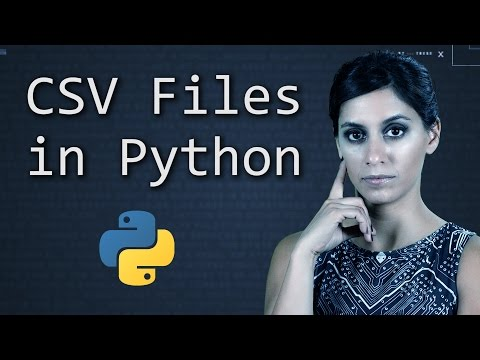

In [3]:
from IPython import display

video = display.YouTubeVideo('Xi52tx6phRU')
video
display.HTML(f'<a href="{video.src}">link</a>')

From the [documentation](https://docs.python.org/3/library/csv.html):

>The so-called CSV (Comma Separated Values) format is the most common import and export format for spreadsheets and databases. CSV format was used for many years prior to attempts to describe the format in a standardized way in [RFC 4180](https://tools.ietf.org/html/rfc4180.html). The lack of a well-defined standard means that subtle differences often exist in the data produced and consumed by different applications. These differences can make it annoying to process CSV files from multiple sources. Still, while the delimiters and quoting characters vary, the overall format is similar enough that it is possible to write a single module which can efficiently manipulate such data, hiding the details of reading and writing the data from the programmer.

Our sample CSV is a snapshot of Google stock data. Use the `open()` function to take a look at the contents:

In [4]:
help(open)

Help on built-in function open in module io:

open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
    Open file and return a stream.  Raise OSError upon failure.
    
    file is either a text or byte string giving the name (and the path
    if the file isn't in the current working directory) of the file to
    be opened or an integer file descriptor of the file to be
    wrapped. (If a file descriptor is given, it is closed when the
    returned I/O object is closed, unless closefd is set to False.)
    
    mode is an optional string that specifies the mode in which the file
    is opened. It defaults to 'r' which means open for reading in text
    mode.  Other common values are 'w' for writing (truncating the file if
    it already exists), 'x' for creating and writing to a new file, and
    'a' for appending (which on some Unix systems, means that all writes
    append to the end of the file regardless of the current seek position

In [5]:
file = open('./video-20.csv')
lines = file.readlines()
for line in lines[:10]: # slice off the first 10 lines
    print(line)

Date,Open,High,Low,Close,Volume,Adj Close

8/19/2014,585.002622,587.342658,584.002627,586.862643,978600,586.862643

8/18/2014,576.11258,584.512631,576.002598,582.162619,1284100,582.162619

8/15/2014,577.862619,579.382595,570.522603,573.482626,1519100,573.482626

8/14/2014,576.182596,577.902645,570.882599,574.652582,985400,574.652582

8/13/2014,567.312567,575.002602,565.752564,574.782577,1439200,574.782577

8/12/2014,564.522567,565.902572,560.882518,562.732562,1542000,562.732562

8/11/2014,569.992585,570.492553,566.002578,567.882551,1214700,567.882551

8/8/2014,563.562536,570.252576,560.352561,568.772565,1494700,568.772565

8/7/2014,568.00257,569.89258,561.102543,563.362525,1110900,563.362525



The `.readlines()` method of `file` (an instance of `TextIOWrapper` [📖 [docs](https://docs.python.org/3/library/io.html#io.TextIOWrapper)]) returns a `list`. This means we could try to parse the elements of this `list` in ignorance of CSV support built into Python:

In [6]:
lines[0]
lines[1]

'Date,Open,High,Low,Close,Volume,Adj Close\n'

'8/19/2014,585.002622,587.342658,584.002627,586.862643,978600,586.862643\n'

We use `str.strip()`, `str.split()` and [list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions):

In [7]:
help(lines[0].strip)
help(lines[0].split)

Help on built-in function strip:

strip(chars=None, /) method of builtins.str instance
    Return a copy of the string with leading and trailing whitespace removed.
    
    If chars is given and not None, remove characters in chars instead.

Help on built-in function split:

split(sep=None, maxsplit=-1) method of builtins.str instance
    Return a list of the words in the string, using sep as the delimiter string.
    
    sep
      The delimiter according which to split the string.
      None (the default value) means split according to any whitespace,
      and discard empty strings from the result.
    maxsplit
      Maximum number of splits to do.
      -1 (the default value) means no limit.



In [8]:
dataset_naive = [line.strip().split(',') for line in lines]
dataset_naive[0]
dataset_naive[1]

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

['8/19/2014',
 '585.002622',
 '587.342658',
 '584.002627',
 '586.862643',
 '978600',
 '586.862643']

The use of `.split(',')` is one of the reasons why this approach is naïve. What would happen when the CSV _content_ contains commas (likely wrapped in quotes)?

In [9]:
import csv
dir(csv)

['Dialect',
 'DictReader',
 'DictWriter',
 'Error',
 'OrderedDict',
 'QUOTE_ALL',
 'QUOTE_MINIMAL',
 'QUOTE_NONE',
 'QUOTE_NONNUMERIC',
 'Sniffer',
 'StringIO',
 '_Dialect',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 'excel',
 'excel_tab',
 'field_size_limit',
 'get_dialect',
 'list_dialects',
 're',
 'reader',
 'register_dialect',
 'unix_dialect',
 'unregister_dialect',
 'writer']

Although the `excel` stuff in there looks interesting, we start with the fundamentals:

In [10]:
help(csv.reader)
help(csv.writer)

Help on built-in function reader in module _csv:

reader(...)
    csv_reader = reader(iterable [, dialect='excel']
                            [optional keyword args])
        for row in csv_reader:
            process(row)
    
    The "iterable" argument can be any object that returns a line
    of input for each iteration, such as a file object or a list.  The
    optional "dialect" parameter is discussed below.  The function
    also accepts optional keyword arguments which override settings
    provided by the dialect.
    
    The returned object is an iterator.  Each iteration returns a row
    of the CSV file (which can span multiple input lines).

Help on built-in function writer in module _csv:

writer(...)
    csv_writer = csv.writer(fileobj [, dialect='excel']
                                [optional keyword args])
        for row in sequence:
            csv_writer.writerow(row)
    
        [or]
    
        csv_writer = csv.writer(fileobj [, dialect='excel']
           

In [11]:
file = open('./video-20.csv', newline='')
reader = csv.reader(file)

header = next(reader)
data = [row for row in reader]

header
data[0]

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

['8/19/2014',
 '585.002622',
 '587.342658',
 '584.002627',
 '586.862643',
 '978600',
 '586.862643']

By specifying `newline=''` in `open`:

>universal newline mode is enabled, but line endings are returned to the caller untranslated

By calling `next()`, we iterate `reader` past the header, saving only data in `data`.

In [12]:
help(next)

Help on built-in function next in module builtins:

next(...)
    next(iterator[, default])
    
    Return the next item from the iterator. If default is given and the iterator
    is exhausted, it is returned instead of raising StopIteration.



We see the output of `data[0]` above and note that all of it is type `str`. Let us add this function to our list comprehension to get the expected types:

In [13]:
from datetime import datetime

def get_row(row):
    if len(row) < 7:
        raise ValueError('The expected row length is not here.')

    date = datetime.strptime(row[0], '%m/%d/%Y')
    open_price = float(row[1])
    high = float(row[2])
    low = float(row[3])
    close = float(row[4])
    volume = int(row[5])
    adj_close = float(row[6])

    return [
        date,
        open_price,
        high,
        low,
        close,
        volume,
        adj_close,
    ]

In [14]:
file = open('./video-20.csv', newline='')
reader = csv.reader(file)

header = next(reader)
data = [get_row(row) for row in reader]

header
data[0]

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

[datetime.datetime(2014, 8, 19, 0, 0),
 585.002622,
 587.342658,
 584.002627,
 586.862643,
 978600,
 586.862643]

### Writing a CSV File

We will use our stock data to calculate daily returns:

In [18]:
def get_daily_return(today, yesterday):
    date_of_today = today[0]
    price_of_today = today[-1] # wrap around to last item
    price_of_yesterday = yesterday[-1]

    return (price_of_today - price_of_yesterday) / price_of_yesterday

In [21]:
file_to_write = open('./video-20-returns.csv', 'w')
writer = csv.writer(file_to_write)
writer_output = writer.writerow(['Date', 'Return'])

for i in range(len(data) - 1):
    today = data[i]
    yesterday = data[i+1]
    daily_return = get_daily_return(today, yesterday)

    date_of_today = today[0].strftime('%m/%d/%Y')
    writer_output = writer.writerow([date_of_today, daily_return])